# Deephyper analytics - hyperparameter search study
**path to data file**: /lus/theta-fs0/projects/datascience/wilsonb/theta/deephyper/model1/model1/m1_hps/results.csv

for customization please see: https://matplotlib.org/api/matplotlib_configuration_api.html

## Setup & Data loading

In [2]:
path_to_data_file = '/home/bwilson/DL/deephyper/model1/model1/m1_hps/results.csv'

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from datetime import datetime
from tqdm import tqdm
from IPython.display import display, Markdown

width = 21
height = width/1.618

matplotlib.rcParams.update({
    'font.size': 21,
    'figure.figsize': (width, height), 
    'figure.facecolor': 'white', 
    'savefig.dpi': 72, 
    'figure.subplot.bottom': 0.125, 
    'figure.edgecolor': 'white',
    'xtick.labelsize': 21,
    'ytick.labelsize': 21})

df = pd.read_csv(path_to_data_file)

display(Markdown(f'The search did _{df.count()[0]}_ **evaluations**.'))

df.head()

The search did _11676_ **evaluations**.

,activation,batch_size,dropout1,dropout2,dropout3,dropout4,embed_hidden_size,epochs,loss,omp_num_threads,optimizer,patience,proportion,units,id,objective,elapsed_sec
0,relu,32,0.05,0.05,0.05,0.05,21,15,binary_crossentropy,64,Adam,12,0.9,10,435e77d2-e014-11eb-b3dc-e77839edcbe4,0.782304,1101.863863
1,relu,32,0.20,0.10,0.20,0.05,21,15,binary_crossentropy,64,Adam,12,0.9,10,435e77d4-e014-11eb-b3dc-e77839edcbe4,0.802577,1034.458559
2,relu,64,0.20,0.05,0.20,0.05,21,15,binary_crossentropy,64,Adam,12,0.9,10,435e77d6-e014-11eb-b3dc-e77839edcbe4,0.784199,692.532207
3,relu,128,0.20,0.10,0.10,0.05,21,15,binary_crossentropy,64,Adam,12,0.9,10,435e77d8-e014-11eb-b3dc-e77839edcbe4,0.603638,495.638471
4,relu,32,0.10,0.10,0.05,0.05,21,15,binary_crossentropy,64,Adam,12,0.9,10,435e77da-e014-11eb-b3dc-e77839edcbe4,0.519326,874.872470


## Statistical summary

In [4]:
df.describe()

,batch_size,dropout1,dropout2,dropout3,dropout4,embed_hidden_size,epochs,omp_num_threads,patience,proportion,units,objective,elapsed_sec
count,11676.000000,11676.000000,11676.000000,11676.000000,11676.00,11676.0,11676.000000,11676.0,11676.0,1.167600e+04,11676.0,11676.000000,11676.000000
mean,74.261048,0.116423,0.116919,0.114624,0.05,21.0,17.605344,64.0,12.0,9.000000e-01,10.0,0.029366,2668.679835
std,39.818987,0.062536,0.062667,0.061578,0.00,0.0,2.497886,0.0,0.0,1.110271e-16,0.0,0.139766,858.462593
min,32.000000,0.050000,0.050000,0.050000,0.05,21.0,15.000000,64.0,12.0,9.000000e-01,10.0,0.000000,318.955266
25%,32.000000,0.050000,0.050000,0.050000,0.05,21.0,15.000000,64.0,12.0,9.000000e-01,10.0,0.000000,1954.792598
50%,64.000000,0.100000,0.100000,0.100000,0.05,21.0,20.000000,64.0,12.0,9.000000e-01,10.0,0.000000,2608.653672
75%,128.000000,0.200000,0.200000,0.200000,0.05,21.0,20.000000,64.0,12.0,9.000000e-01,10.0,0.000000,3389.443703
max,128.000000,0.200000,0.200000,0.200000,0.05,21.0,20.000000,64.0,12.0,9.000000e-01,10.0,0.902046,4258.099351


## Search trajectory

<ipython-input-5-2f9e09d9cf73>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1512x934.487 with 0 Axes>

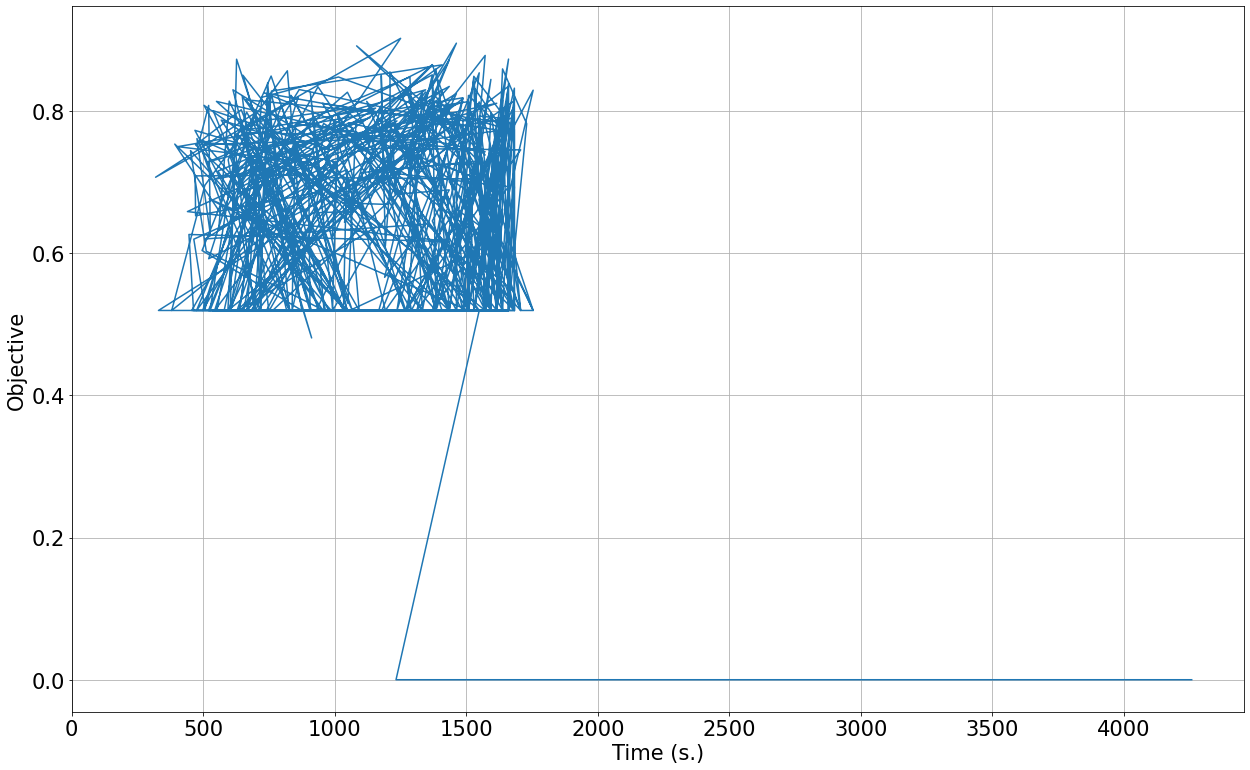

In [5]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(df.elapsed_sec, df.objective)
ax.set_ylabel('Objective')
ax.set_xlabel('Time (s.)')
ax.set_xlim(0)
ax.grid()
fig.show()

## Pairplots

In [ ]:
not_include = ['elapsed_sec']
sns.pairplot(df.loc[:, filter(lambda n: n not in not_include, df.columns)],
                diag_kind="kde", markers="o",
                plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                diag_kws=dict(shade=True))
plt.show()

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots()
corr = df.loc[:, filter(lambda n: n not in not_include, df.columns)].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax)
ax.set_yticklabels(corr.columns, va='center')
plt.show()

## Best objective

In [9]:
i_max = df.objective.idxmax()
df.iloc[i_max]

activation                                           relu
batch_size                                             32
dropout1                                             0.05
dropout2                                             0.05
dropout3                                              0.1
dropout4                                             0.05
embed_hidden_size                                      21
epochs                                                 20
loss                                  binary_crossentropy
omp_num_threads                                        64
optimizer                                            Adam
patience                                               12
proportion                                            0.9
units                                                  10
id                   435e78da-e014-11eb-b3dc-e77839edcbe4
objective                                        0.902046
elapsed_sec                                       1250.48
Name: 132, dty

In [10]:
dict(df.iloc[i_max])

{'activation': 'relu',
 'batch_size': 32,
 'dropout1': 0.05,
 'dropout2': 0.05,
 'dropout3': 0.1,
 'dropout4': 0.05,
 'embed_hidden_size': 21,
 'epochs': 20,
 'loss': 'binary_crossentropy',
 'omp_num_threads': 64,
 'optimizer': 'Adam',
 'patience': 12,
 'proportion': 0.9,
 'units': 10,
 'id': '435e78da-e014-11eb-b3dc-e77839edcbe4',
 'objective': 0.9020462296324364,
 'elapsed_sec': 1250.4827599525454}